# Regression Template - Pycaret

In [1]:
!pip install pycaret
!pip install pycaret-nightly

     |████████████████████████████████| 266kB 8.7MB/s 
     |████████████████████████████████| 1.7MB 14.9MB/s 
     |████████████████████████████████| 245kB 19.7MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 102kB 6.7MB/s 
     |████████████████████████████████| 276kB 48.4MB/s 
     |████████████████████████████████| 215kB 46.4MB/s 
     |████████████████████████████████| 1.8MB 48.8MB/s 
     |████████████████████████████████| 14.2MB 281kB/s 
     |████████████████████████████████| 6.8MB 36.6MB/s 
     |████████████████████████████████| 3.2MB 40.6MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 1.1MB 43.0MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 1.1MB 44.7MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
     |

In [2]:
import pandas as pd
from pycaret.regression import *

In [16]:
from pycaret.datasets import get_data
df=get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
def CategoricalImputation_OneHot(df,variable):
    temp=pd.get_dummies(df[variable], drop_first=True)
    items=[df,temp]
    df=pd.concat(items,axis=1)
    return df

In [19]:
#using one hot encoding for sex and smoker column
df=CategoricalImputation_OneHot(df,'smoker')
df=CategoricalImputation_OneHot(df,'sex')

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges,yes,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [21]:
#Now lets drop both smoker and sex column
df=df.drop('sex',axis=1)
df=df.drop('smoker',axis=1)

In [23]:
#For region lets use monotonicity encoding technique
ordered_labels=df.groupby(['region'])['charges'].mean().sort_values().index
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 1)}
df['region_ordered']=df['region'].map(ordinal_label)

In [25]:
#Now lets drop the region column
df=df.drop('region',axis=1)

In [26]:
df.isnull().sum()

age               0
bmi               0
children          0
charges           0
yes               0
male              0
region_ordered    0
dtype: int64

In [28]:
#Next,lets do normalization of all input variables
from sklearn.preprocessing import StandardScaler
# set up the scaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(df.iloc[:,[0,1,2,4,5,6]])
df_scaled=scaler.transform(df.iloc[:,[0,1,2,4,5,6]])

In [30]:
df_scaled=pd.DataFrame(df_scaled,columns=df.iloc[:,[0,1,2,4,5,6]].columns)

In [32]:
df_scaled['charges']=df['charges']

In [34]:
df.head()

,age,bmi,children,charges,yes,male,region_ordered
0,19,27.900,0,16884.92400,1,0,1
1,18,33.770,1,1725.55230,0,1,4
2,28,33.000,3,4449.46200,0,1,4
3,33,22.705,0,21984.47061,0,1,2
4,32,28.880,0,3866.85520,0,1,2


In [35]:
data=setup(df,target='charges',preprocess=False,use_gpu=True)

,Description,Value
0,session_id,4086
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,2
6,Transformed Train Set,"(936, 6)"
7,Transformed Test Set,"(402, 6)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


In [36]:
#Selecting top3 models for tuning
top3_models=compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2505.8394,2.116202e+07,4551.3809,0.8614,0.4231,0.2949,0.100
rf,Random Forest Regressor,2724.0775,2.443308e+07,4907.3015,0.8398,0.4762,0.3373,0.895
et,Extra Trees Regressor,2726.6060,2.634576e+07,5094.9547,0.8271,0.4720,0.3126,0.884
ada,AdaBoost Regressor,3871.2499,2.661863e+07,5130.4310,0.8246,0.5966,0.6511,0.035
lar,Least Angle Regression,4161.1542,3.639492e+07,6013.9856,0.7599,0.5604,0.4348,0.010
br,Bayesian Ridge,4165.9695,3.639422e+07,6013.8801,0.7599,0.5610,0.4355,0.010
llar,Lasso Least Angle Regression,4158.5032,3.640030e+07,6014.0551,0.7599,0.5677,0.4337,0.010
ridge,Ridge Regression,4174.0733,3.639523e+07,6013.8782,0.7599,0.5629,0.4368,0.013
lasso,Lasso Regression,4161.5193,3.639485e+07,6013.9645,0.7599,0.5605,0.4348,0.011
lr,Linear Regression,4161.1542,3.639492e+07,6013.9856,0.7599,0.5604,0.4348,0.013


In [37]:
print(top3_models)

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4086, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_w

In [38]:
pd.set_option('display.max_rows',None)

In [39]:
#Tuning the top 3 models
tuned_model_top3=[tune_model(i) for i in top3_models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1882.2384,1.957168e+07,4423.9892,0.8779,0.2561,0.1335
1,2406.7690,2.921504e+07,5405.0937,0.8166,0.3903,0.1504
2,2754.7062,3.901618e+07,6246.2930,0.7816,0.4835,0.1868
3,2106.8379,1.820870e+07,4267.1657,0.8821,0.3894,0.1598
4,1864.3355,1.508255e+07,3883.6260,0.8830,0.3502,0.1575
5,2446.6797,2.879311e+07,5365.9210,0.8172,0.4721,0.1823
6,1770.8637,2.054422e+07,4532.5734,0.8416,0.4560,0.1316
7,2537.2653,2.221947e+07,4713.7531,0.8705,0.3142,0.1717
8,2028.0233,2.218033e+07,4709.5997,0.8275,0.3731,0.1336
9,1688.8298,1.477472e+07,3843.7892,0.9003,0.2937,0.1600


In [40]:
print(tuned_model_top3)

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=2,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4086, subsample=0.3, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=6, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.02,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weig

In [41]:
#Ensembling top 3 tuned models
bagged_tuned_top3=[ensemble_model(i,method='Bagging') for i in tuned_model_top3]


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1786.2491,1.907253e+07,4367.2102,0.8810,0.2445,0.1278
1,2287.4566,2.740016e+07,5234.5159,0.8280,0.3860,0.1497
2,2837.0281,3.809846e+07,6172.3947,0.7868,0.4845,0.1859
3,2190.1975,1.945758e+07,4411.0747,0.8740,0.3878,0.1753
4,1858.2650,1.505671e+07,3880.2977,0.8832,0.3484,0.1441
5,2651.4979,3.076183e+07,5546.3347,0.8047,0.4598,0.2012
6,1802.7317,1.982454e+07,4452.4753,0.8472,0.4503,0.1522
7,2116.9532,1.760696e+07,4196.0643,0.8974,0.2982,0.1491
8,2197.8694,2.262709e+07,4756.7937,0.8240,0.3755,0.1538
9,1549.9045,1.336328e+07,3655.5824,0.9098,0.2592,0.1294


In [42]:
print(bagged_tuned_top3)

[BaggingRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9,
                                                          ccp_alpha=0.0,
                                                          criterion='friedman_mse',
                                                          init=None,
                                                          learning_rate=0.01,
                                                          loss='ls',
                                                          max_depth=2,
                                                          max_features=1.0,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.005,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=3,
                                                          min_samples_split=5,
    

In [43]:
#Blend top3 models
blender=blend_models(estimator_list=top3_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2486.3884,2.075253e+07,4555.4945,0.8706,0.3679,0.2949
1,2900.4116,2.765656e+07,5258.9503,0.8264,0.4594,0.2921
2,3173.9490,3.523981e+07,5936.3132,0.8028,0.5053,0.3181
3,2285.4676,1.713160e+07,4139.0331,0.8890,0.4617,0.3040
4,2284.2642,1.634853e+07,4043.3321,0.8732,0.3968,0.2722
5,3129.5888,2.842975e+07,5331.9558,0.8195,0.5717,0.4488
6,2388.7083,2.041344e+07,4518.1234,0.8426,0.4807,0.2840
7,2781.4894,2.222913e+07,4714.7784,0.8705,0.4167,0.3197
8,2590.7180,2.100840e+07,4583.4919,0.8366,0.4293,0.2712
9,1996.2654,1.527343e+07,3908.1230,0.8970,0.3748,0.2975


In [44]:
stacker=stack_models(top3_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2418.9280,1.937507e+07,4401.7127,0.8792,0.3632,0.2916
1,2623.0612,2.515539e+07,5015.5152,0.8421,0.4158,0.2388
2,3204.7764,3.571567e+07,5976.2588,0.8001,0.5298,0.3245
3,2289.3375,1.622523e+07,4028.0551,0.8949,0.4485,0.2956
4,2248.3844,1.478586e+07,3845.2389,0.8853,0.3593,0.2548
5,3094.8236,2.763465e+07,5256.8668,0.8246,0.5372,0.4002
6,2359.4479,1.948749e+07,4414.4638,0.8498,0.4731,0.2963
7,2443.7379,1.776239e+07,4214.5446,0.8965,0.3332,0.2366
8,2368.4205,1.967514e+07,4435.6665,0.8470,0.3851,0.2224
9,2023.0633,1.459933e+07,3820.9073,0.9015,0.3493,0.2757


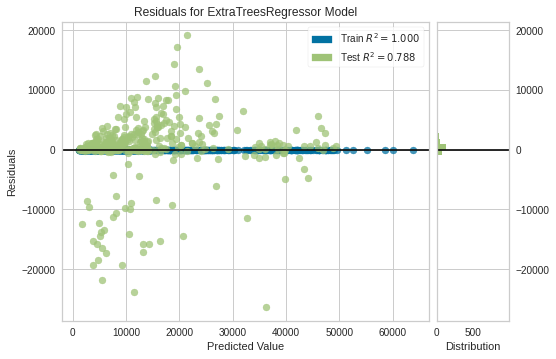

[None, None, None]

In [45]:
[plot_model(i) for i in top3_models]

In [46]:
[evaluate_model(i) for i in top3_models]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

[None, None, None]

In [47]:
!pip install shap


     |████████████████████████████████| 358kB 8.7MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491616 sha256=0a0fd55d85a43b52379d143760f69924abc11c9415a581848da4d5bdfc6bf613
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [75]:
top3_models[1]

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=4086, verbose=0, warm_start=False)

In [96]:
import shap
explainer = shap.Explainer(top3_models[0])
shap_values = explainer(df_scaled)

In [98]:
shap.plots.waterfall(shap_values[0])

Exception: ignored

In [80]:
shap.initjs()
#Visualize first prediction
shap.plots.force(shap_values[2])

In [88]:
display(shap.plots.force(explainer.expected_value[0], shap_values[0]))

AssertionError: ignored

In [94]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)



[06:12:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [95]:
shap_values

.values =
array([[-0.51467264, -0.20504883,  0.06660128, ...,  0.4995593 ,
         0.13651758,  5.601616  ],
       [-0.33332354, -0.06292161, -0.17551032, ...,  0.71119964,
         0.07554361,  1.7569411 ],
       [-0.29614973, -0.06196661, -0.32156122, ...,  0.30347508,
         0.19353725,  6.9513354 ],
       ...,
       [-0.5108058 , -0.18954909,  0.03790583, ..., -1.4830108 ,
         0.06967882,  2.8791142 ],
       [ 0.31853032, -0.18596269,  0.0397671 , ..., -1.508986  ,
         0.15543678,  2.6643074 ],
       [-0.8217313 , -0.20032728, -0.06452336, ..., -1.2430359 ,
         0.03995529,  1.7653933 ]], dtype=float32)

.base_values =
array([22.532942, 22.532942, 22.532942, 22.532942, 22.532942, 22.532942,
       22.532942, 22.532942, 22.532942, 22.532942, 22.532942, 22.532942,
       22.532942, 22.532942, 22.532942, 22.532942, 22.532942, 22.532942,
       22.532942, 22.532942, 22.532942, 22.532942, 22.532942, 22.532942,
       22.532942, 22.532942, 22.532942, 22.532942, 22.

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

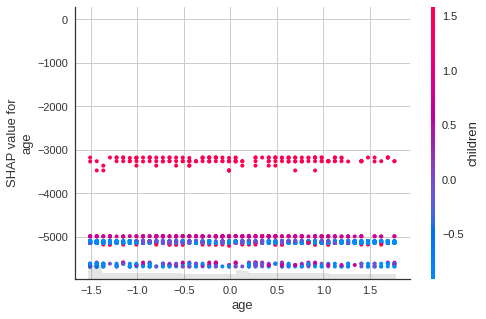

In [81]:
#Visualize all predictions
shap.plots.scatter(shap_values[:,"age"],shap_values)

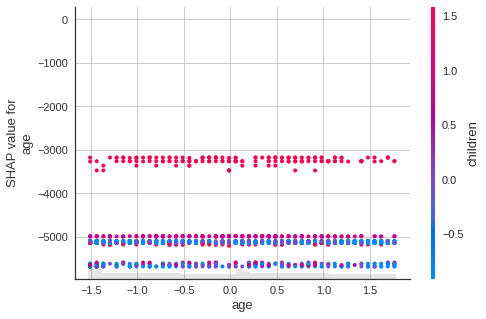

In [71]:
shap.plots.scatter(shap_values[:,"age"], color=shap_values)

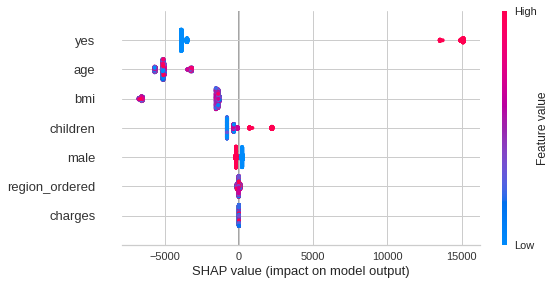

In [72]:
shap.plots.beeswarm(shap_values)

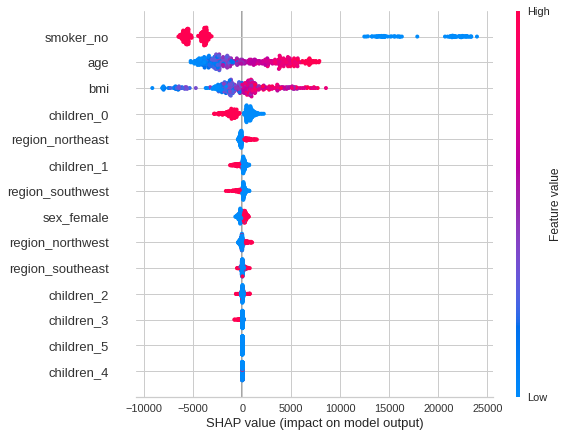

In [18]:
top3_models
#[interpret_model(i) for i in best_model]
interpret_model(top3_models[1],)

In [19]:
final_model=automl(optimize='R2')

In [20]:
print(final_model)

StackingRegressor(cv=KFold(n_splits=10, random_state=RandomState(MT19937) at 0x7F512CF9D160,
   shuffle=False),
                  estimators=[('gbr',
                               GradientBoostingRegressor(alpha=0.9,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls', max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_le...
       

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [22]:
save_model(final_model,'/content/gdrive/My Drive/regression_final')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['sex', 'children',
                                                             'smoker',
                                                             'region'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_val...
                                                                       min_impurity_decrease=0.0,
                                                                       min_impurity_split=None,
                            